Rizky Elinda Sari

09011282025084

SK5B

In [ ]:
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctr
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
x_suhu = ctr.Antecedent(np.arange(0, 101, 1), 'x_suhu')
x_asap = ctr.Antecedent(np.arange(0, 501, 1), 'x_asap')
y_kipas = ctr.Consequent(np.arange(0, 121, 1), 'y_kipas')

In [4]:
#inputan suhu
x_suhu['normal'] = fuzz.trapmf(x_suhu.universe, (0, 0, 25, 30))
x_suhu['hangat'] = fuzz.trimf(x_suhu.universe, (25, 30, 35))
x_suhu['panas']  = fuzz.trapmf(x_suhu.universe, (30, 35, 100, 100))

#inputan asap
x_asap['renggang'] = fuzz.trapmf(x_asap.universe, (0, 0, 150, 200))
x_asap['sedang']   = fuzz.trimf(x_asap.universe, (150, 200, 300))
x_asap['padat']    = fuzz.trapmf(x_asap.universe, (200, 300, 500, 500))

#output kipas
y_kipas['mati']   = fuzz.trapmf(y_kipas.universe, (0, 0, 30, 70))
y_kipas['sedang'] = fuzz.trimf(y_kipas.universe, (30, 70, 90))
y_kipas['cepat']  = fuzz.trapmf(y_kipas.universe, (70, 90, 120, 120))

C:\Users\Lenovo\anaconda3\lib\site-packages\skfuzzy\control\fuzzyvariable.py:122: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


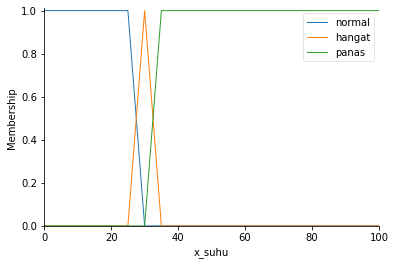

In [5]:
x_suhu.view()

C:\Users\Lenovo\anaconda3\lib\site-packages\skfuzzy\control\fuzzyvariable.py:122: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


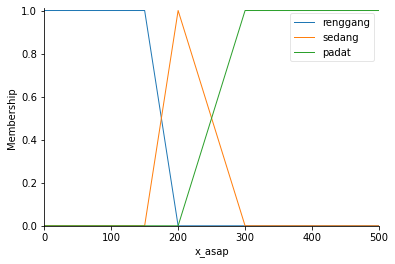

In [6]:
x_asap.view()

C:\Users\Lenovo\anaconda3\lib\site-packages\skfuzzy\control\fuzzyvariable.py:122: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


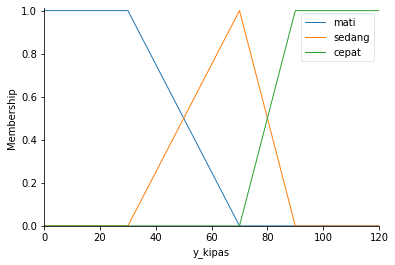

In [7]:
y_kipas.view()

In [8]:
rule1 = ctr.Rule(x_suhu['normal'] & x_asap['renggang'], y_kipas['mati'])
rule2 = ctr.Rule(x_suhu['normal'] & x_asap['sedang'], y_kipas['mati'])
rule3 = ctr.Rule(x_suhu['normal'] & x_asap['padat'], y_kipas['sedang'])

rule4 = ctr.Rule(x_suhu['hangat'] & x_asap['renggang'], y_kipas['mati']) 
rule5 = ctr.Rule(x_suhu['hangat'] & x_asap['sedang'], y_kipas['sedang'])
rule6 = ctr.Rule(x_suhu['hangat'] & x_asap['padat'], y_kipas['cepat'])

rule7 = ctr.Rule(x_suhu['panas'] & x_asap['renggang'], y_kipas['sedang'])
rule8 = ctr.Rule(x_suhu['panas'] & x_asap['sedang'], y_kipas['cepat'])
rule9 = ctr.Rule(x_suhu['panas'] & x_asap['padat'], y_kipas['cepat'])



In [9]:
#membuat kontrol sistem yang kondisinya diambil berdasarkan aturan/rule yang telah dibuat
kipas_rule1 = ctr.ControlSystem([rule1, rule2, rule3, rule4, rule5, rule6, rule7, rule8, rule9 ])

In [10]:
#membuat simulasi control sistem
kipas = ctr.ControlSystemSimulation(kipas_rule1)

In [22]:
#membuat interupsi yangmeminta inputan dari kipas
suhu = input('Temperatur Suhu : ')
asap = input('Kondisi Asap : ')

Temperatur Suhu : 32
Kondisi Asap : 280


In [23]:
kipas.input['x_suhu'] = float(suhu)
kipas.input['x_asap'] = float(asap)

kipas.compute()

87.82352941176458


C:\Users\Lenovo\anaconda3\lib\site-packages\skfuzzy\control\fuzzyvariable.py:122: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


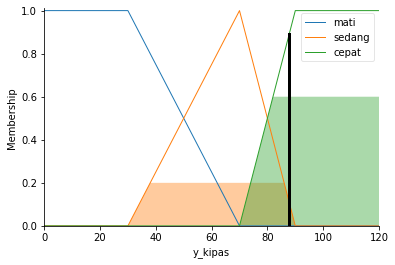

In [24]:
print(kipas.output['y_kipas'])
y_kipas.view(sim=kipas)